# N Step SARSA

## Imports

In [16]:
import gym
import itertools
import numpy as np
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm
from collections import defaultdict

from agents import WindyGridworldEnv, value_iteration, n_step_sarsa

def rmse_fn(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

## Value Iteration Ground Truth

In [6]:
env = WindyGridworldEnv()

policy, V = value_iteration(env, discount_factor=0.99)

gt_values = V

## N Step SARSA RMSE

In [18]:
LEARNING_RATES = np.arange(0.1, 1.1, 0.1)
N_VALUES = [2, 4, 8, 16]
DISCOUNT_FACTOR = 0.99

In [20]:
env = WindyGridworldEnv()

pbar = tqdm(list(itertools.product(LEARNING_RATES, N_VALUES)))
results = defaultdict(list)
for (lr, n) in pbar:
    rmses = []
    for i in range(1):
        Q, max_reward = n_step_sarsa(env, 200, n, DISCOUNT_FACTOR, lr)
    
        values = np.max(Q, axis=1)
        rmses.append(rmse_fn(values, gt_values))
    
    results[n].append((lr, np.mean(rmses)))
    
    break

  0%|          | 0/40 [00:00<?, ?it/s]

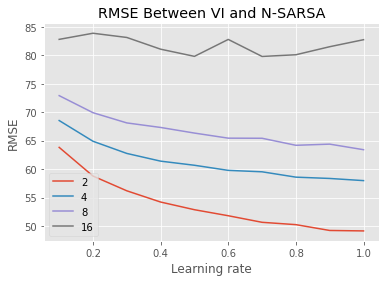

In [21]:
for n in N_VALUES:
    plt.plot(*zip(*results[n]), label=f"{n}")

plt.xlabel(f"Learning rate")
plt.ylabel("RMSE")    
plt.title("RMSE Between VI and N-SARSA")

plt.legend()
plt.show()